# TUTORIAL PARA O DESENVOLVIMENTO DE ANÁLISES QUIMIOMÉTRICAS - MACHINE LEARNING
# ESTUDO DE CASO 1: DADOS DE RMN PARA DIAGNÓSTICO DE COVID-19:
# Neste banco de dados contem espetros de RMN de pacientes COVID-19 (n=280) e voluntários saudáveis(n=261). O Objetivo é desenvolver um modelo de machine learning para predição do diagnóstico de COVID-19 e identificar biomarcadores associados a infeção por SARS-CoV-2

In [ ]:
# Tarefa a ser executada
# Passo 1: Importar o banco de dados
# Passo 2: Importar a biblioteca Pandas para ajudar a manipular o banco de dados 
# Passo 3: Remover colunas desnecessárias
# Passo 4: Instalando a biblioteca Pycaret (ajuda a realizar o Auto-Machine Learn)
# Passo 5: Importando a biblioteca Pycaret
# Passo 6: realizando o Pré-processamento dos dados
# Passo 7: Construindo e comparando diversos modelos
# Passo 8: Treinando o melhor modelo com base nas métricas de desempenho preditivo
# Passo 9: Extraindo os resultados das métricas do modelo
# Passo 10: Conclusoes sobre o modelo
# Passo 11: Salvando o modelo para realizar predições na vida real (Deploy)

In [3]:
# Passo 1: Importar o banco de dados

from google.colab import files
uploaded = files.upload()

Saving Dataset3.xlsx to Dataset3.xlsx


In [4]:
# Passo 2: Importar a biblioteca Pandas para ajudar a manipular o banco de dados 
import pandas as pd
df1 = pd.read_excel("Dataset3.xlsx")
display (df1)

cic_id     Class  HMDB0000452  HMDB0000008  HMDB0000208  \
0    HC-COVID0001.2  COVID-19         0.00        0.220        0.013   
1      HC-COVID0008  COVID-19         0.10        0.000        0.000   
2      HC-COVID0010  COVID-19         0.00        0.170        0.008   
3      HC-COVID0012  COVID-19         0.00        0.000        0.000   
4      HC-COVID0014  COVID-19         0.00        0.000        0.012   
..              ...       ...          ...          ...          ...   
536        17S36203   Healthy         0.00        0.000        0.000   
537        17S45787   Healthy         0.13        0.000        0.013   
538        17S46342   Healthy         0.00        0.000        0.013   
539        17S46357   Healthy         0.00        0.004        0.000   
540        17S02866   Healthy         0.00        0.000        0.000   

     HMDB0000357  HMDB0000042  HMDB0000060  HMDB0001659  HMDB0000161  ...  \
0           0.12         0.01        0.020         0.02         0.70  ...   
1           0.26         0.03        0.060         0.07         0.41  ...   
2           0.36         0.03        0.070         0.05         0.51  ...   
3           0.08         0.02        0.000         0.03         0.51  ...   
4           0.05         0.02        0.005         0.02         0.42  ...   
..           ...          ...          ...          ...          ...  ...   
536         0.19         0.01        0.006         0.03         0.46  ...   
537         0.14         0.04        0.050         0.07         0.38  ...   
538         0.05         0.01        0.004         0.02         0.30  ...   
539         0.00         0.03        0.009         0.01         0.46  ...   
540         0.03         0.02        0.005         0.04         0.38  ...   

     HMDB0000214  HMDB0000159  HMDB0000162  HMDB0000243  HMDB0000271  \
0           0.09         0.15         0.44         0.15        0.001   
1           0.00         0.10         0.00         0.07        0.000   
2           0.00         0.09         0.40         0.11        0.005   
3           0.00         0.11         0.19         0.09        0.000   
4           0.00         0.12         0.00         0.12        0.007   
..           ...          ...          ...          ...          ...   
536         0.00         0.07         0.00         0.09        0.004   
537         0.15         0.09         0.30         0.06        0.004   
538         0.00         0.06         0.00         0.10        0.003   
539         0.00         0.07         0.38         0.04        0.002   
540         0.00         0.06         0.00         0.03        0.020   

     HMDB0000254  HMDB0000167  HMDB0000925  HMDB0000158  HMDB0000883  
0          0.003         0.35        0.014         0.11         0.39  
1          0.010         0.00        0.020         0.06         0.25  
2          0.020         0.28        0.014         0.06         0.21  
3          0.003         0.00        0.056         0.05         0.29  
4          0.003         0.00        0.005         0.04         0.21  
..           ...          ...          ...          ...          ...  
536        0.006         0.11        0.031         0.05         0.22  
537        0.009         0.00        0.031         0.07         0.34  
538        0.003         0.18        0.018         0.05         0.25  
539        0.003         0.14        0.002         0.08         0.28  
540        0.005         0.00        0.026         0.05         0.23  

[541 rows x 43 columns]

In [5]:
# Passo 3: Remover colunas desnecessárias
df2 = df1.drop("cic_id", axis = 1)

In [6]:
display(df2)

Class  HMDB0000452  HMDB0000008  HMDB0000208  HMDB0000357  \
0    COVID-19         0.00        0.220        0.013         0.12   
1    COVID-19         0.10        0.000        0.000         0.26   
2    COVID-19         0.00        0.170        0.008         0.36   
3    COVID-19         0.00        0.000        0.000         0.08   
4    COVID-19         0.00        0.000        0.012         0.05   
..        ...          ...          ...          ...          ...   
536   Healthy         0.00        0.000        0.000         0.19   
537   Healthy         0.13        0.000        0.013         0.14   
538   Healthy         0.00        0.000        0.013         0.05   
539   Healthy         0.00        0.004        0.000         0.00   
540   Healthy         0.00        0.000        0.000         0.03   

     HMDB0000042  HMDB0000060  HMDB0001659  HMDB0000161  HMDB0000168  ...  \
0           0.01        0.020         0.02         0.70        0.120  ...   
1           0.03        0.060         0.07         0.41        0.000  ...   
2           0.03        0.070         0.05         0.51        0.047  ...   
3           0.02        0.000         0.03         0.51        0.000  ...   
4           0.02        0.005         0.02         0.42        0.000  ...   
..           ...          ...          ...          ...          ...  ...   
536         0.01        0.006         0.03         0.46        0.045  ...   
537         0.04        0.050         0.07         0.38        0.050  ...   
538         0.01        0.004         0.02         0.30        0.000  ...   
539         0.03        0.009         0.01         0.46        0.000  ...   
540         0.02        0.005         0.04         0.38        0.000  ...   

     HMDB0000214  HMDB0000159  HMDB0000162  HMDB0000243  HMDB0000271  \
0           0.09         0.15         0.44         0.15        0.001   
1           0.00         0.10         0.00         0.07        0.000   
2           0.00         0.09         0.40         0.11        0.005   
3           0.00         0.11         0.19         0.09        0.000   
4           0.00         0.12         0.00         0.12        0.007   
..           ...          ...          ...          ...          ...   
536         0.00         0.07         0.00         0.09        0.004   
537         0.15         0.09         0.30         0.06        0.004   
538         0.00         0.06         0.00         0.10        0.003   
539         0.00         0.07         0.38         0.04        0.002   
540         0.00         0.06         0.00         0.03        0.020   

     HMDB0000254  HMDB0000167  HMDB0000925  HMDB0000158  HMDB0000883  
0          0.003         0.35        0.014         0.11         0.39  
1          0.010         0.00        0.020         0.06         0.25  
2          0.020         0.28        0.014         0.06         0.21  
3          0.003         0.00        0.056         0.05         0.29  
4          0.003         0.00        0.005         0.04         0.21  
..           ...          ...          ...          ...          ...  
536        0.006         0.11        0.031         0.05         0.22  
537        0.009         0.00        0.031         0.07         0.34  
538        0.003         0.18        0.018         0.05         0.25  
539        0.003         0.14        0.002         0.08         0.28  
540        0.005         0.00        0.026         0.05         0.23  

[541 rows x 42 columns]

In [7]:
# Passo 4: Instalando a biblioteca Pycaret (ajuda a realizar o Auto-Machine Learn)
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [9]:
# Passo 5: Importando a biblioteca Pycaret

from pycaret import classification


In [10]:
# Passo 6: realizando o Pré-processamento dos dados
classification_setup = classification.setup(data = df2, target = "Class")

Description                    Value
0                               session_id                      404
1                                   Target                    Class
2                              Target Type                   Binary
3                            Label Encoded  COVID-19: 0, Healthy: 1
4                            Original Data                (541, 42)
5                           Missing Values                    False
6                         Numeric Features                       40
7                     Categorical Features                        1
8                         Ordinal Features                    False
9                High Cardinality Features                    False
10                 High Cardinality Method                     None
11                   Transformed Train Set                (378, 41)
12                    Transformed Test Set                (163, 41)
13                      Shuffle Train-Test                     True
14                     Stratify Train-Test                    False
15                          Fold Generator          StratifiedKFold
16                             Fold Number                       10
17                                CPU Jobs                       -1
18                                 Use GPU                    False
19                          Log Experiment                    False
20                         Experiment Name         clf-default-name
21                                     USI                     06b7
22                         Imputation Type                   simple
23          Iterative Imputation Iteration                     None
24                         Numeric Imputer                     mean
25      Iterative Imputation Numeric Model                     None
26                     Categorical Imputer                 constant
27  Iterative Imputation Categorical Model                     None
28           Unknown Categoricals Handling           least_frequent
29                               Normalize                    False
30                        Normalize Method                     None
31                          Transformation                    False
32                   Transformation Method                     None
33                                     PCA                    False
34                              PCA Method                     None
35                          PCA Components                     None
36                     Ignore Low Variance                    False
37                     Combine Rare Levels                    False
38                    Rare Level Threshold                     None
39                         Numeric Binning                    False
40                         Remove Outliers                    False
41                      Outliers Threshold                     None
42                Remove Multicollinearity                    False
43             Multicollinearity Threshold                     None
44             Remove Perfect Collinearity                     True
45                              Clustering                    False
46                    Clustering Iteration                     None
47                     Polynomial Features                    False
48                       Polynomial Degree                     None
49                    Trignometry Features                    False
50                    Polynomial Threshold                     None
51                          Group Features                    False
52                       Feature Selection                    False
53                Feature Selection Method                  classic
54            Features Selection Threshold                     None
55                     Feature Interaction                    False
56                           Feature Ratio                    False
57                   Interaction Threshold                     None
58                 

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [11]:
# Passo 7: Construindo e comparando diversos modelos
modelos = classification.compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
ada                  Ada Boost Classifier    0.9709  0.9978  0.9700  0.9757   
et                 Extra Trees Classifier    0.9709  0.9969  0.9850  0.9616   
rf               Random Forest Classifier    0.9682  0.9959  0.9747  0.9663   
lda          Linear Discriminant Analysis    0.9630  0.9881  0.9900  0.9447   
lightgbm  Light Gradient Boosting Machine    0.9550  0.9944  0.9645  0.9530   
gbc          Gradient Boosting Classifier    0.9522  0.9930  0.9745  0.9386   
qda       Quadratic Discriminant Analysis    0.9312  0.9619  0.9392  0.9318   
dt               Decision Tree Classifier    0.9287  0.9281  0.9489  0.9212   
ridge                    Ridge Classifier    0.9206  0.0000  0.9847  0.8792   
nb                            Naive Bayes    0.9126  0.9642  0.9489  0.8936   
lr                    Logistic Regression    0.8836  0.9510  0.9489  0.8463   
knn                K Neighbors Classifier    0.8624  0.9143  0.9437  0.8223   
svm                   SVM - Linear Kernel    0.8205  0.0000  0.8361  0.8537   
dummy                    Dummy Classifier    0.5159  0.5000  1.0000  0.5159   

              F1   Kappa     MCC  TT (Sec)  
ada       0.9720  0.9417  0.9434     0.129  
et        0.9725  0.9417  0.9433     0.127  
rf        0.9701  0.9362  0.9371     0.268  
lda       0.9659  0.9257  0.9289     0.012  
lightgbm  0.9575  0.9096  0.9121     0.092  
gbc       0.9550  0.9041  0.9073     0.223  
qda       0.9338  0.8623  0.8657     0.016  
dt        0.9329  0.8568  0.8612     0.011  
ridge     0.9282  0.8399  0.8487     0.009  
nb        0.9185  0.8245  0.8304     0.010  
lr        0.8940  0.7659  0.7736     0.230  
knn       0.8771  0.7226  0.7354     0.016  
svm       0.8109  0.6401  0.6812     0.009  
dummy     0.6805  0.0000  0.0000     0.010

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=404)
INFO:logs:compare_models() succesfully completed......................................


In [27]:
# Passo 8: Treinando o melhor modelo com base nas métricas de desempenho preditivo
# Nota: O modelo Ada Boost Classifier foi o melhor. Agora, Criaremos o modelo Ada Boost Classifier
modelo_ada = classification.create_model("ada")

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
3       0.9737  0.9917    0.95  1.0000  0.9744  0.9474  0.9487
4       0.9474  1.0000    0.90  1.0000  0.9474  0.8950  0.9000
5       0.9737  1.0000    1.00  0.9524  0.9756  0.9471  0.9484
6       0.9211  0.9944    0.95  0.9048  0.9268  0.8412  0.8424
7       0.9474  0.9944    0.90  1.0000  0.9474  0.8950  0.9000
8       0.9730  1.0000    1.00  0.9500  0.9744  0.9458  0.9472
9       0.9730  0.9971    1.00  0.9500  0.9744  0.9458  0.9472
Mean    0.9709  0.9978    0.97  0.9757  0.9720  0.9417  0.9434
Std     0.0248  0.0030    0.04  0.0323  0.0237  0.0497  0.0486

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=404)
INFO:logs:create_model() succesfully completed......................................


In [28]:
# Passo 9: Extraindo os resultados das métricas do modelo
# General evaluation
classification.evaluate_model(modelo_ada)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=404), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


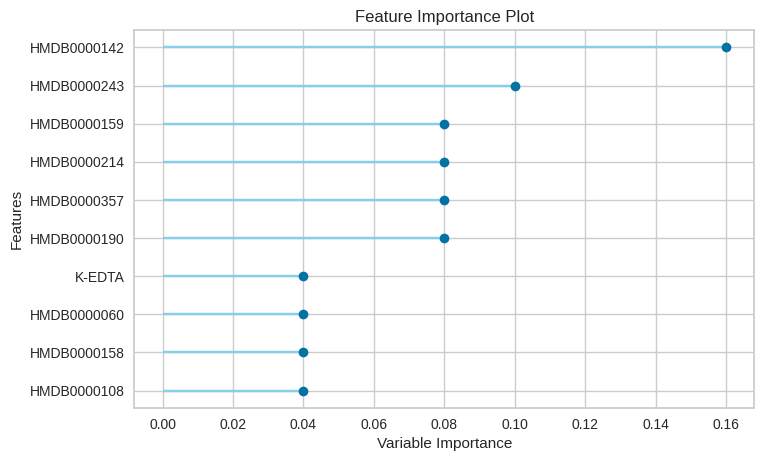

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
# Plotando apenas os TOP 10 biomarcadoers mais importantes
classification.plot_model(modelo_ada, plot ="feature")

In [30]:
# Passo 10: Conclusoes sobre o modelo
# Diversos Modelos de machine learning foram construidos para a predição do diagnóstico de COVID-19 usando dados de RMN de pacientes COVID-19
# O modelo Random Ada Classifier foi o que apresentou melhor desempenho preditivo
#  Os top 5 biomarcadores mais importantes para o diagnóstico de COVID-19 foram:HMDB0000142, HMDB0000243, HMDB0000190,HMDB0000190 e HMDB0000214
# O próximo passo é desenvoler o App para que o modelo seja utilizado nas Unidados de saúde. 

In [31]:
# Passo 11: Salvando o modelo para realizar predições na vida real (Deploy)
classification.save_model(modelo_ada, "melhor_modelo_Ada")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=404), model_name=melhor_modelo_Ada, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dummy', Dummify(target='Class')),
                 ('fix_perfect', Remove_100(target='Class')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs